In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
#create set random lat and long combinations
lats = np.random.uniform(low=-90, high=90, size=2000)
lngs = np.random.uniform(low=-180, high=180, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#create list for holding cities
cities = []

#Identify the nearest city each lat and long
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city unique then add city to list
    if city not in cities:
        cities.append(city)
#print city count
len(cities)

717

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all cities
for i in range(len(cities)):
    
    #group cities in sets of 50
    if (i % 50==0 and i>=50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    # create endpoint
    city_url = url + "&q=" + cities[i]

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 18 of Set 29 | kuvandyk
Processing Record 19 of Set 29 | albany
Processing Record 20 of Set 29 | bambous virieux
Processing Record 21 of Set 29 | scarborough
Processing Record 22 of Set 29 | kapaa
Processing Record 23 of Set 29 | puerto ayora
Processing Record 24 of Set 29 | cape town
Processing Record 25 of Set 29 | gat
Processing Record 26 of Set 29 | bac lieu
Processing Record 27 of Set 29 | jamestown
Processing Record 28 of Set 29 | riohacha
Processing Record 29 of Set 29 | juneau
Processing Record 30 of Set 29 | ushuaia
Processing Record 31 of Set 29 | castro
Processing Record 32 of Set 29 | maua
Processing Record 33 of Set 29 | souillac
Processing Record 34 of Set 29 | hobart
Processing Record 35 of Set 29 | atuona
Processing Record 36 of Set 29 | lavrentiya
Processing Record 37 of Set 29 | barrow
Processing Record 38 of Set 29 | port elizabeth
Processing Record 39 of Set 29 | jalu
Processing Record 40 of Set 29 | coahuayana
Processing Record 41 of Set 29 | linc

Processing Record 34 of Set 32 | bengkulu
Processing Record 35 of Set 32 | sitka
Processing Record 36 of Set 32 | sinnamary
Processing Record 37 of Set 32 | elko
Processing Record 38 of Set 32 | arlit
Processing Record 39 of Set 32 | saint anthony
Processing Record 40 of Set 32 | kalawit
Processing Record 41 of Set 32 | la gaulette
City not found. Skipping...
Processing Record 42 of Set 32 | vostok
Processing Record 43 of Set 32 | tilichiki
Processing Record 44 of Set 32 | maxixe
Processing Record 45 of Set 32 | manta
Processing Record 46 of Set 32 | salym
Processing Record 47 of Set 32 | okmulgee
Processing Record 48 of Set 32 | yarensk
Processing Record 49 of Set 32 | scottsbluff
Processing Record 50 of Set 32 | zaysan
Processing Record 1 of Set 33 | meulaboh
Processing Record 2 of Set 33 | dzhusaly
City not found. Skipping...
Processing Record 3 of Set 33 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 33 | fare
Processing Record 5 of Set 33 | roros
Processing

Processing Record 23 of Set 36 | muscat
Processing Record 24 of Set 36 | esik
Processing Record 25 of Set 36 | maragogi
Processing Record 26 of Set 36 | gizo
Processing Record 27 of Set 36 | la ronge
Processing Record 28 of Set 36 | khash
Processing Record 29 of Set 36 | mapiripan
Processing Record 30 of Set 36 | port hardy
Processing Record 31 of Set 36 | kindu
Processing Record 32 of Set 36 | katsiveli
City not found. Skipping...
Processing Record 33 of Set 36 | oriximina
Processing Record 34 of Set 36 | magaria
Processing Record 35 of Set 36 | rapar
Processing Record 36 of Set 36 | sorong
Processing Record 37 of Set 36 | rungata
City not found. Skipping...
Processing Record 38 of Set 36 | klaksvik
Processing Record 39 of Set 36 | chama
Processing Record 40 of Set 36 | viedma
Processing Record 41 of Set 36 | leland
Processing Record 42 of Set 36 | kavieng
Processing Record 43 of Set 36 | doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 36 | havre-saint-pie

Processing Record 9 of Set 40 | maitum
Processing Record 10 of Set 40 | ksenyevka
City not found. Skipping...
Processing Record 11 of Set 40 | roebourne
Processing Record 12 of Set 40 | san quintin
Processing Record 13 of Set 40 | lillehammer
Processing Record 14 of Set 40 | praya
Processing Record 15 of Set 40 | wilmington
Processing Record 16 of Set 40 | ewa beach
Processing Record 17 of Set 40 | pangkalanbuun
Processing Record 18 of Set 40 | utiroa
City not found. Skipping...
Processing Record 19 of Set 40 | muzhi
Processing Record 20 of Set 40 | gorno-chuyskiy
City not found. Skipping...
Processing Record 21 of Set 40 | kirakira
Processing Record 22 of Set 40 | kasongo-lunda
Processing Record 23 of Set 40 | kysyl-syr
Processing Record 24 of Set 40 | casablanca
Processing Record 25 of Set 40 | coria
Processing Record 26 of Set 40 | dubbo
Processing Record 27 of Set 40 | taoudenni
Processing Record 28 of Set 40 | komsomolskiy
Processing Record 29 of Set 40 | montepuez
Processing Reco

In [19]:
#convert array of dict to Pandas
city_data_df = pd.DataFrame(city_data)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kuvandyk,RU,2022-02-12 20:20:23,51.4781,57.3552,16.66,96,91,5.14
1,Albany,US,2022-02-12 20:16:36,42.6001,-73.9662,46.15,55,55,7.00
2,Bambous Virieux,MU,2022-02-12 20:20:23,-20.3428,57.7575,80.85,83,40,9.22
3,Scarborough,GB,2022-02-12 20:19:53,54.2797,-0.4044,46.51,85,100,15.99
4,Kapaa,US,2022-02-12 20:20:24,22.0752,-159.3190,77.18,72,40,9.22
5,Puerto Ayora,EC,2022-02-12 20:20:24,-0.7393,-90.3518,85.96,85,97,5.01
6,Cape Town,ZA,2022-02-12 20:20:24,-33.9258,18.4232,70.09,80,0,14.97
7,Gat,IL,2022-02-12 20:20:25,31.6100,34.7642,57.40,75,0,5.08
8,Bac Lieu,VN,2022-02-12 20:19:07,9.2850,105.7244,77.86,83,100,13.96
9,Jamestown,US,2022-02-12 20:20:25,42.0970,-79.2353,29.52,63,100,14.97


In [24]:
# Create the output file (CSV).
output_data_file = "weather_database/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

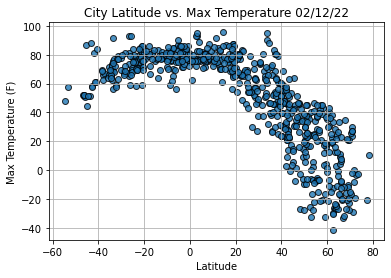

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()

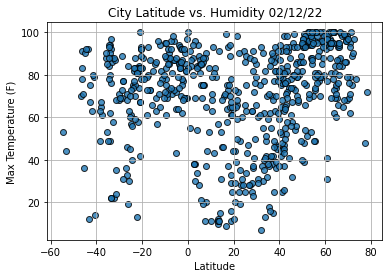

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()

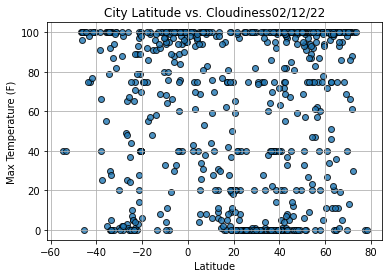

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()

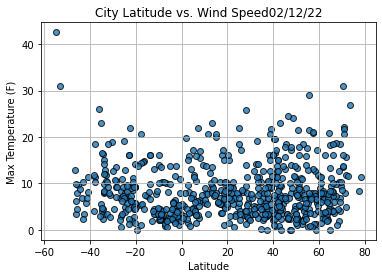

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()